#Teste de Estacionaridade

##Importar Libs

In [17]:
import numpy as np                    #Manipulações Matemáticas
import pandas as pd                   #Manipulações de DataFrames e Series
import warnings                       #Supressão de FutureWarnings
import matplotlib.pyplot as plt       #Manipulações Gráficas
import statsmodels.tsa.stattools      #Realizações de Testes Estátisticos
from matplotlib.pylab import rcParams #Alteração de parametros de gráficos do matplotlib

In [21]:
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 15, 6

##Criação da Série

In [6]:
np.random.seed(10)
dados1 = np.random.normal(0, 1, 41)
dados1

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155])

In [7]:
dados1 = pd.DataFrame(dados1, columns=['valores'])
ddados1.head()

,valores
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [8]:
dados1.shape

(41, 1)

In [9]:
indice = pd.date_range('1980', periods=len(dados1), freq='Y')
indice

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [10]:
serie1 = pd.Series(dados1['valores'].values, index=indice)

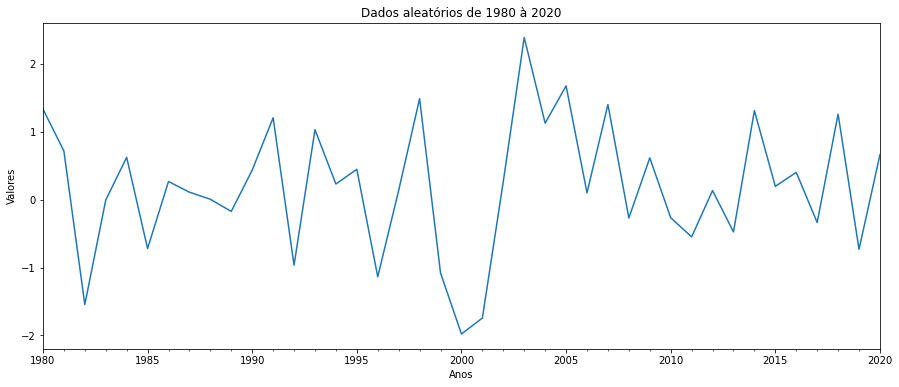

In [12]:
serie1.plot()
plt.title('Dados aleatórios de 1980 à 2020')
plt.xlabel('Anos')
plt.ylabel('Valores')
plt.show()

##Testes de Estacionaridade

###Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

* H0 = Não é estacionário: Estátistica do teste > valor crítico
* H1 = É estacionário: Estátistica do teste < valor crítico

In [44]:
kpss = statsmodels.tsa.stattools.kpss(serie1);

print('Estátistica do Teste: {:.4f}'.format(kpss[0]))
print('p-value: {:.4f}'.format(kpss[1]))
print('Número de Lags: {}'.format(kpss[2]))
print('\n Valores Críticos:')

for chave, valor in kpss[3].items():
  if kpss[0] < valor:
    print('Estacionário - {}: {:.4f}'.format(chave, valor))
  else:
    print('Não Estacionário - {}: {:.4f}'.format(chave, valor))

Estátistica do Teste: 0.1918
p-value: 0.1000
Número de Lags: 10

 Valores Críticos:
Estacionário - 10%: 0.3470
Estacionário - 5%: 0.4630
Estacionário - 2.5%: 0.5740
Estacionário - 1%: 0.7390


###Teste Dickey Fuller

* H0 = Não é estacionário: Estátistica do teste > valor crítico
* H1 = É estacionário: Estátistica do teste < valor crítico

In [43]:
df = statsmodels.tsa.stattools.adfuller(serie1);

print('Estátistica do Teste: {:.4f}'.format(df[0]))
print('p-value: {:.4f}'.format(df[1])) 
print('\n Valores Críticos:')

for chave, valor in df[4].items():
  if df[0] < valor:
    print('Estacionário - {}: {:.4f}'.format(chave, valor))
  else:
    print('Não Estacionário - {}: {:.4f}'.format(chave, valor))

Estátistica do Teste: -5.8642
p-value: 0.0000

 Valores Críticos:
Estacionário - 1%: -3.6056
Estacionário - 5%: -2.9371
Estacionário - 10%: -2.6070


##Dataset Importado

AirPassegers: Dados Clássicos da compainha aérea Box & Jenkins. Totais mensais de passageiros de compainhas aéreas internacionais de 1949 à 1960.

In [33]:
serie2 = pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/AirPassengers.csv')
serie2.columns = ['mes_anos','qt_passageiros']
serie2.head()

,mes_ano,qt_passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [34]:
serie2 = pd.Series(serie2['qt_passageiros'].values, index=serie2['mes_ano'])
serie2

mes_ano
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

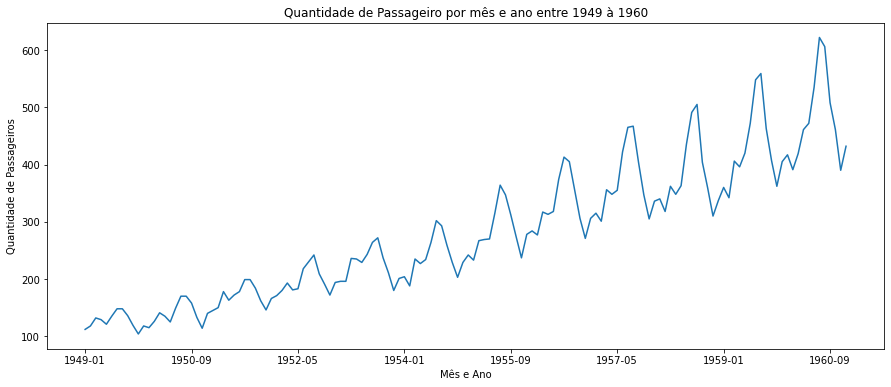

In [36]:
serie2.plot()
plt.title('Quantidade de Passageiro por mês e ano entre 1949 à 1960')
plt.xlabel('Mês e Ano')
plt.ylabel('Quantidade de Passageiros')
plt.show()

###Testes de Estacionaridade

####KPSS

* H0 = Não é estacionário: Estátistica do teste > valor crítico
* H1 = É estacionário: Estátistica do teste < valor crítico

In [45]:
kpss = statsmodels.tsa.stattools.kpss(serie2);

print('Estátistica do Teste: {:.4f}'.format(kpss[0]))
print('p-value: {:.4f}'.format(kpss[1]))
print('Número de Lags: {}'.format(kpss[2]))
print('\n Valores Críticos:')

for chave, valor in kpss[3].items():
  if kpss[0] < valor:
    print('Estacionário - {}: {:.4f}'.format(chave, valor))
  else:
    print('Não Estacionário - {}: {:.4f}'.format(chave, valor))

Estátistica do Teste: 1.0522
p-value: 0.0100
Número de Lags: 14

 Valores Críticos:
Não Estacionário - 10%: 0.3470
Não Estacionário - 5%: 0.4630
Não Estacionário - 2.5%: 0.5740
Não Estacionário - 1%: 0.7390


####Dickey Fuller

* H0 = Não é estacionário: Estátistica do teste > valor crítico
* H1 = É estacionário: Estátistica do teste < valor crítico

In [46]:
df = statsmodels.tsa.stattools.adfuller(serie2);

print('Estátistica do Teste: {:.4f}'.format(df[0]))
print('p-value: {:.4f}'.format(df[1])) 
print('\n Valores Críticos:')

for chave, valor in df[4].items():
  if df[0] < valor:
    print('Estacionário - {}: {:.4f}'.format(chave, valor))
  else:
    print('Não Estacionário - {}: {:.4f}'.format(chave, valor))

Estátistica do Teste: 0.8154
p-value: 0.9919

 Valores Críticos:
Não Estacionário - 1%: -3.4817
Não Estacionário - 5%: -2.8840
Não Estacionário - 10%: -2.5788
